In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(ggpubr)
library(rstatix)
library(parallel)
library(ggpubr)
library(anndata)
library(ggsci)
library(ggrepel)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate



Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter




In [2]:
clr_transform <- function(x) {
  if (length(x) == 0) {
    return(NA)  # return NA for empty vectors
  }
  geom_mean <- exp(mean(log(x)))
  return(log(x / geom_mean))
}

In [3]:
meta_data<-read.csv('/home//jupyter/BRI_Analysis/scRNA/hise_meta_data_2024-01-23_fixed.csv')

In [4]:
counts_df<-read.csv('/home//jupyter/BRI_Analysis/scRNA/BRI_Counts_AIFI_L3.csv',check.names = FALSE)

In [5]:
long_counts_df<-pivot_longer(counts_df, 
                        cols = -c(AIFI_L3), 
                        names_to = "pbmc_sample_id",
                        values_to = "counts") 

In [6]:
long_counts_df<-left_join(long_counts_df,meta_data)

Joining with `by = join_by(pbmc_sample_id)`


In [7]:
long_counts_df<-long_counts_df[!is.na(long_counts_df$counts),]

In [8]:
long_counts_df<-long_counts_df %>% 
  group_by(pbmc_sample_id) %>% 
  mutate(total = sum(counts),
         percentage = counts / total) %>% 
  select(-total)%>%
  dplyr::ungroup()%>% group_by(pbmc_sample_id) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>%
  dplyr::ungroup()

In [9]:
long_counts_df$Group=paste0(long_counts_df$cohort.cohortGuid,'-',long_counts_df$subject.biologicalSex)

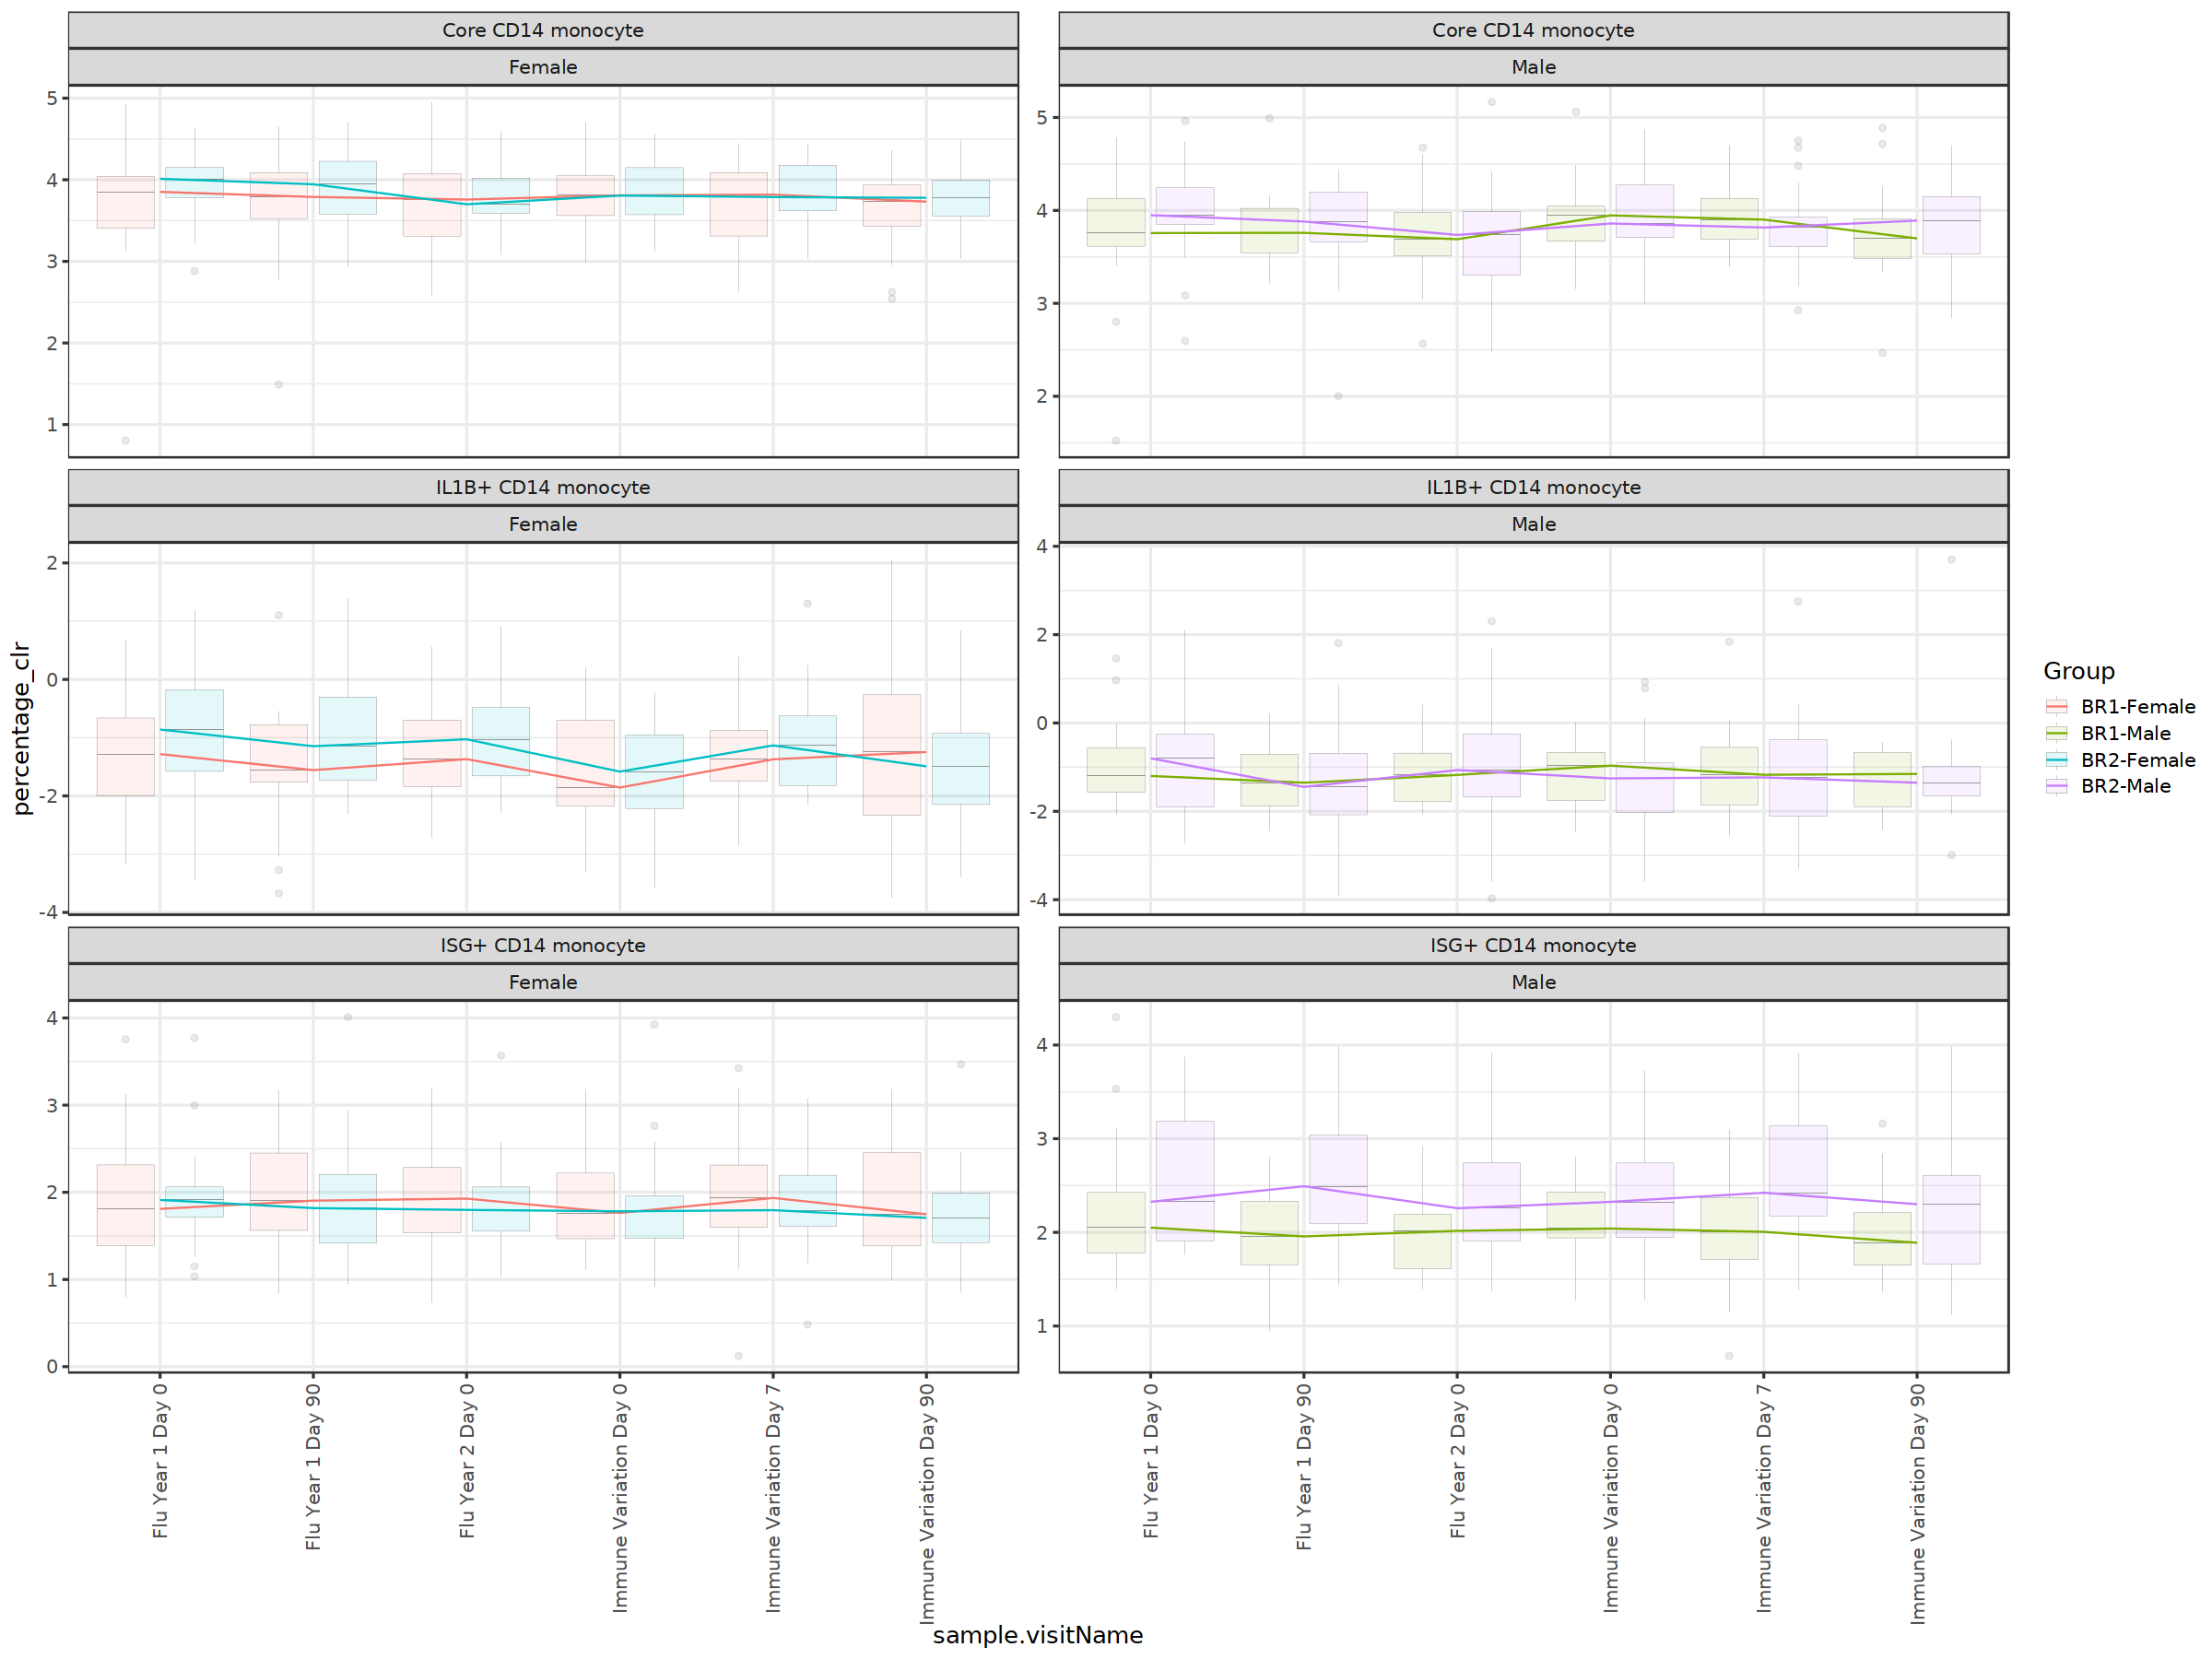

In [11]:
options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(long_counts_df %>% filter(AIFI_L3 %in% c('IL1B+ CD14 monocyte', 'Core CD14 monocyte',  'ISG+ CD14 monocyte'))%>%
       filter(!sample.visitName %in% c('Flu Year 1 Day 7','Flu Year 2 Day 7',
                                       'Flu Year 1 Stand-Alone','Flu Year 2 Day 90',
                                                   'Flu Year 2 Stand-Alone',
                                                   'Flu Year 3 Stand-Alone')), 
       aes(x = sample.visitName, y = percentage_clr, fill = Group)) +
  geom_boxplot(position = position_dodge(width = 0.9),size=0.05,alpha=0.1) +
  stat_summary(
    fun.y = median,
    geom = 'line',
    aes(group =Group, colour = Group) )+theme_bw(base_size=15)+ 
theme(axis.text.x = element_text(angle = 90,
                                 vjust = 0.5,
                                 hjust = 1))+
facet_wrap(~AIFI_L3+subject.biologicalSex,ncol=2,scale='free_y')

# Stablity of CMV+ only population by ages

In [12]:
expanded_CMV_celltypes<-c('Adaptive NK cell','KLRF1- GZMB+ CD27- EM CD8 T cell','KLRF1+ GZMB+ CD27- EM CD8 T cell','GZMK+ CD27+ EM CD8 T cell',
                              'KLRF1- GZMB+ CD27- memory CD4 T cell','KLRF1- effector Vd1 gdT','KLRF1+ effector Vd1 gdT')

In [ ]:
read.abs

In [14]:
long_counts_df_subset<-long_counts_df %>%filter(AIFI_L3%in% expanded_CMV_celltypes)

In [17]:
long_counts_df_subset<-long_counts_df_subset %>% filter(CMV.IgG.Serology.Result.Interpretation=='Positive')

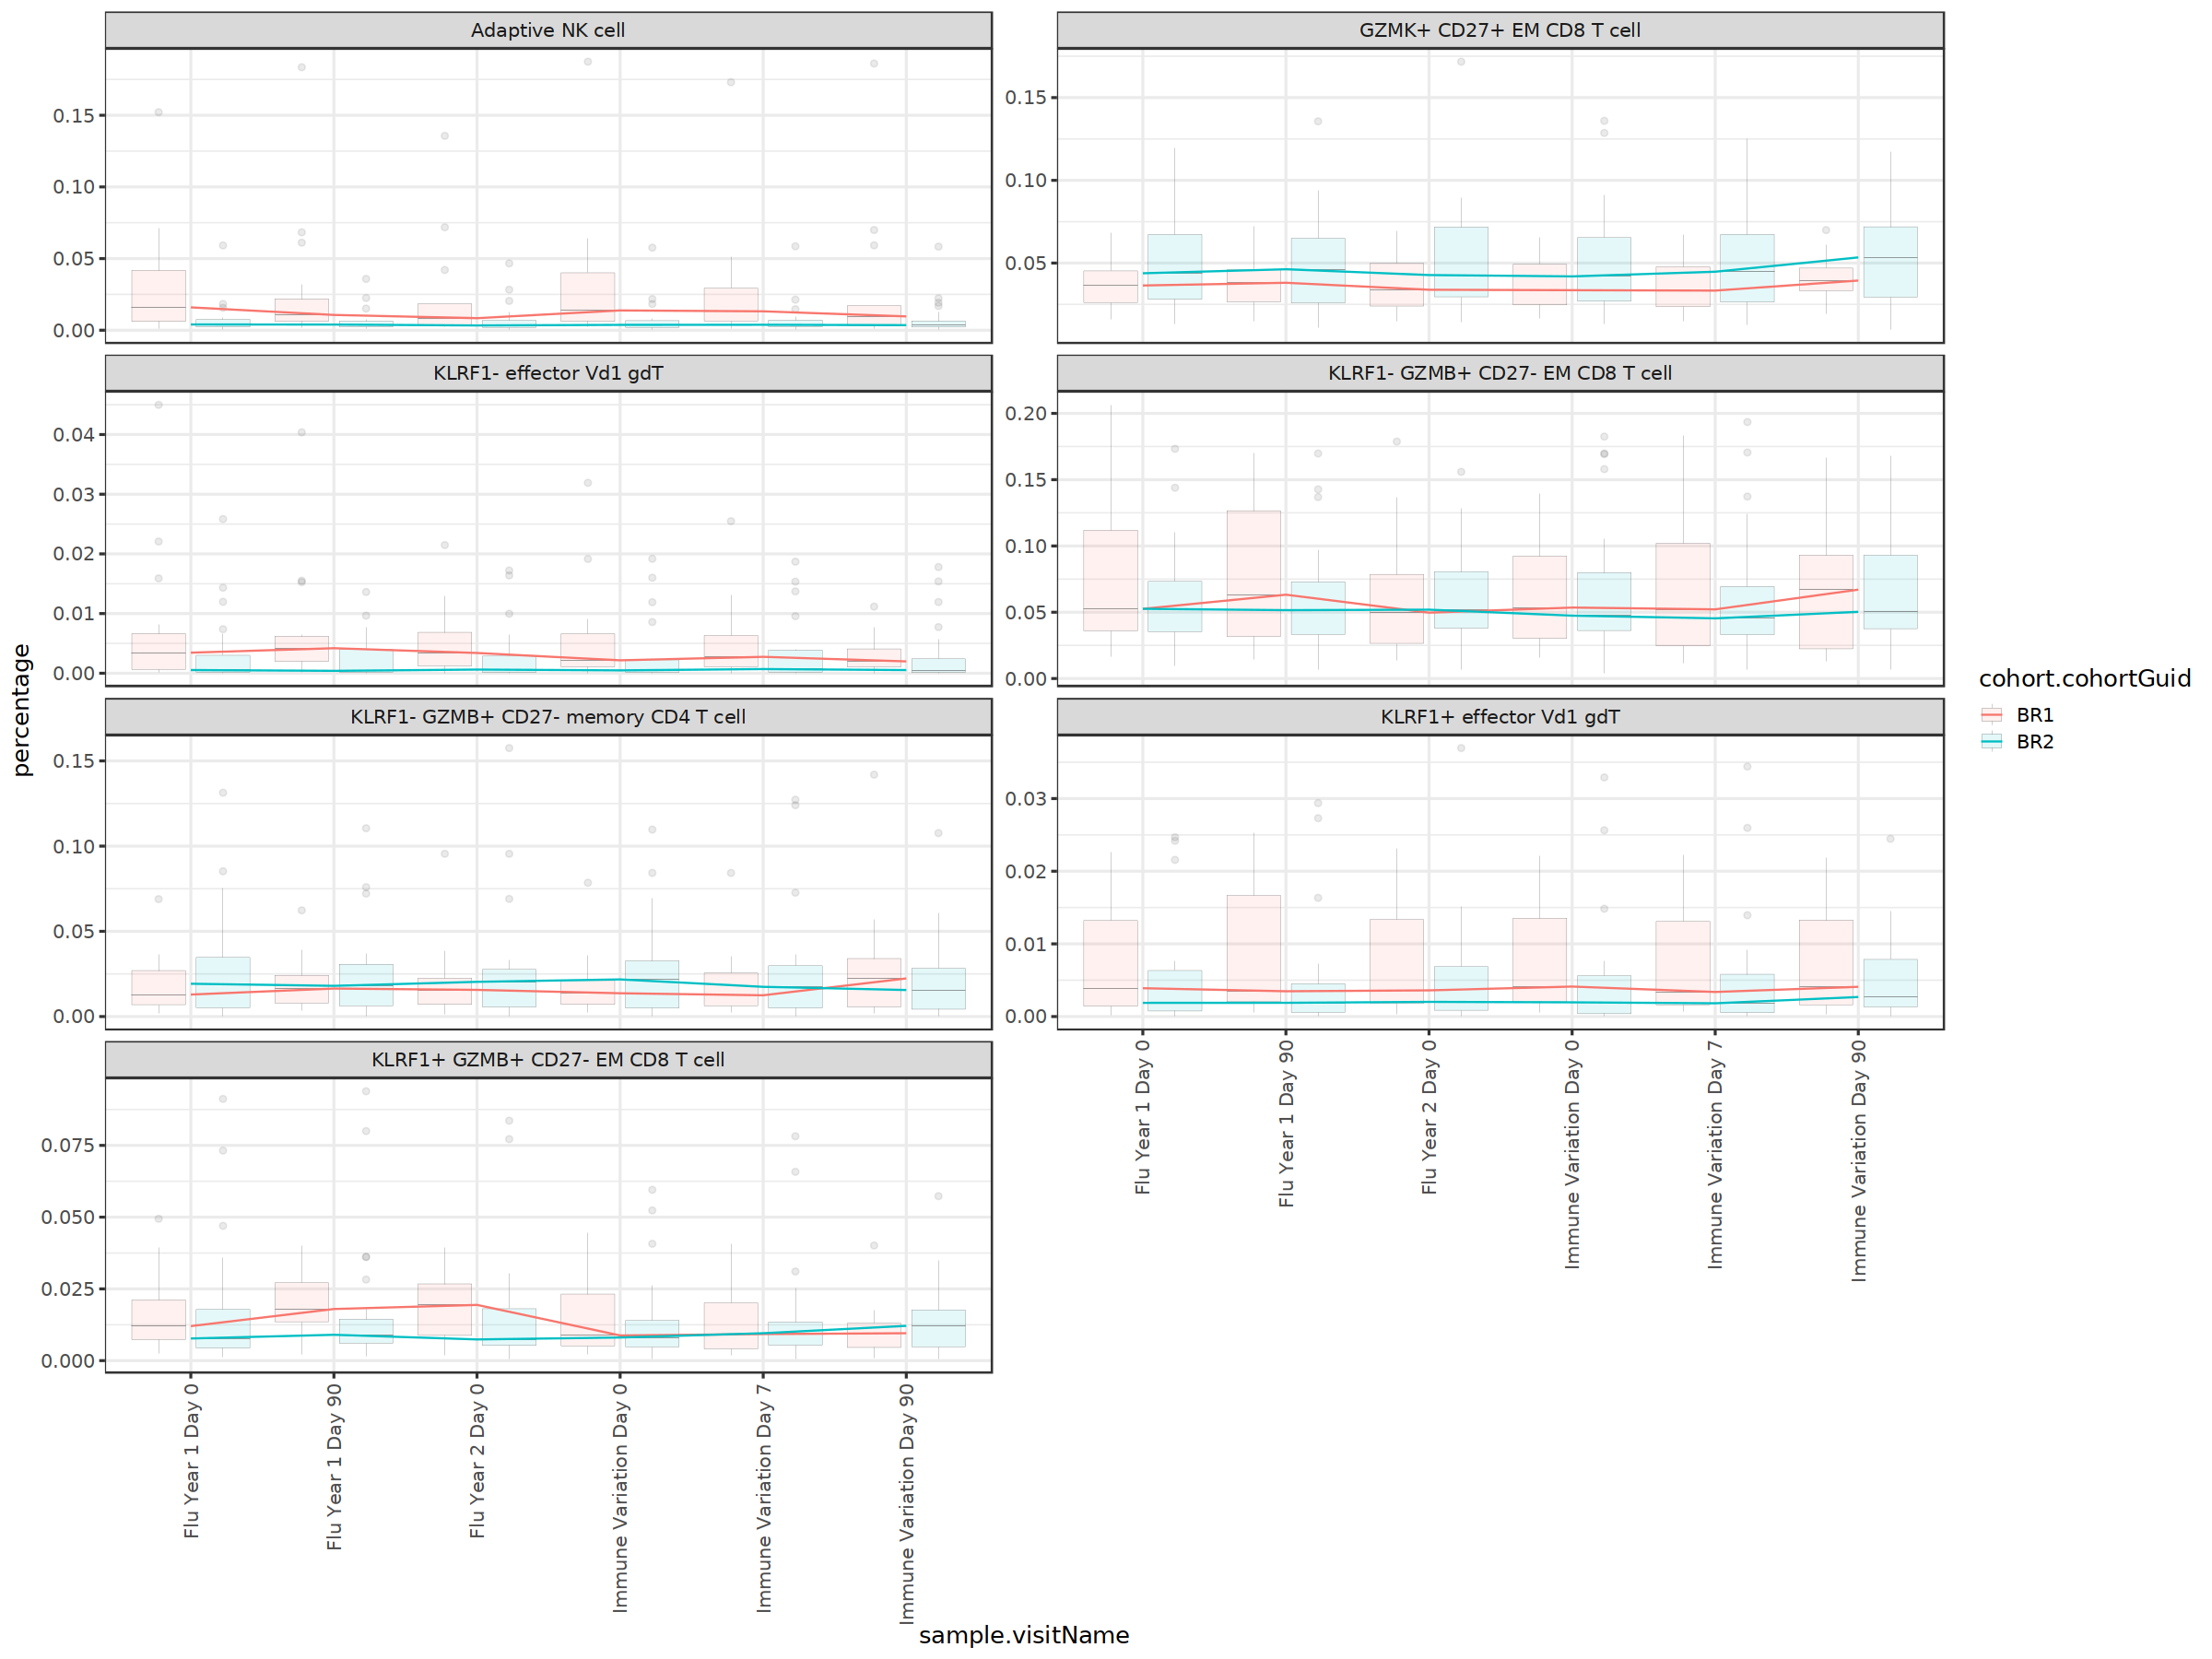

In [22]:
options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(long_counts_df_subset %>% 
       filter(!sample.visitName %in% c('Flu Year 1 Day 7','Flu Year 2 Day 7',
                                       'Flu Year 1 Stand-Alone','Flu Year 2 Day 90',
                                                   'Flu Year 2 Stand-Alone',
                                                   'Flu Year 3 Stand-Alone')), 
       aes(x = sample.visitName, y = percentage, fill = cohort.cohortGuid)) +
  geom_boxplot(position = position_dodge(width = 0.9),size=0.05,alpha=0.1) +
  stat_summary(
    fun.y = median,
    geom = 'line',
    aes(group =cohort.cohortGuid, colour = cohort.cohortGuid) )+theme_bw(base_size=15)+ 
theme(axis.text.x = element_text(angle = 90,
                                 vjust = 0.5,
                                 hjust = 1))+
facet_wrap(~AIFI_L3,ncol=2,scale='free_y')

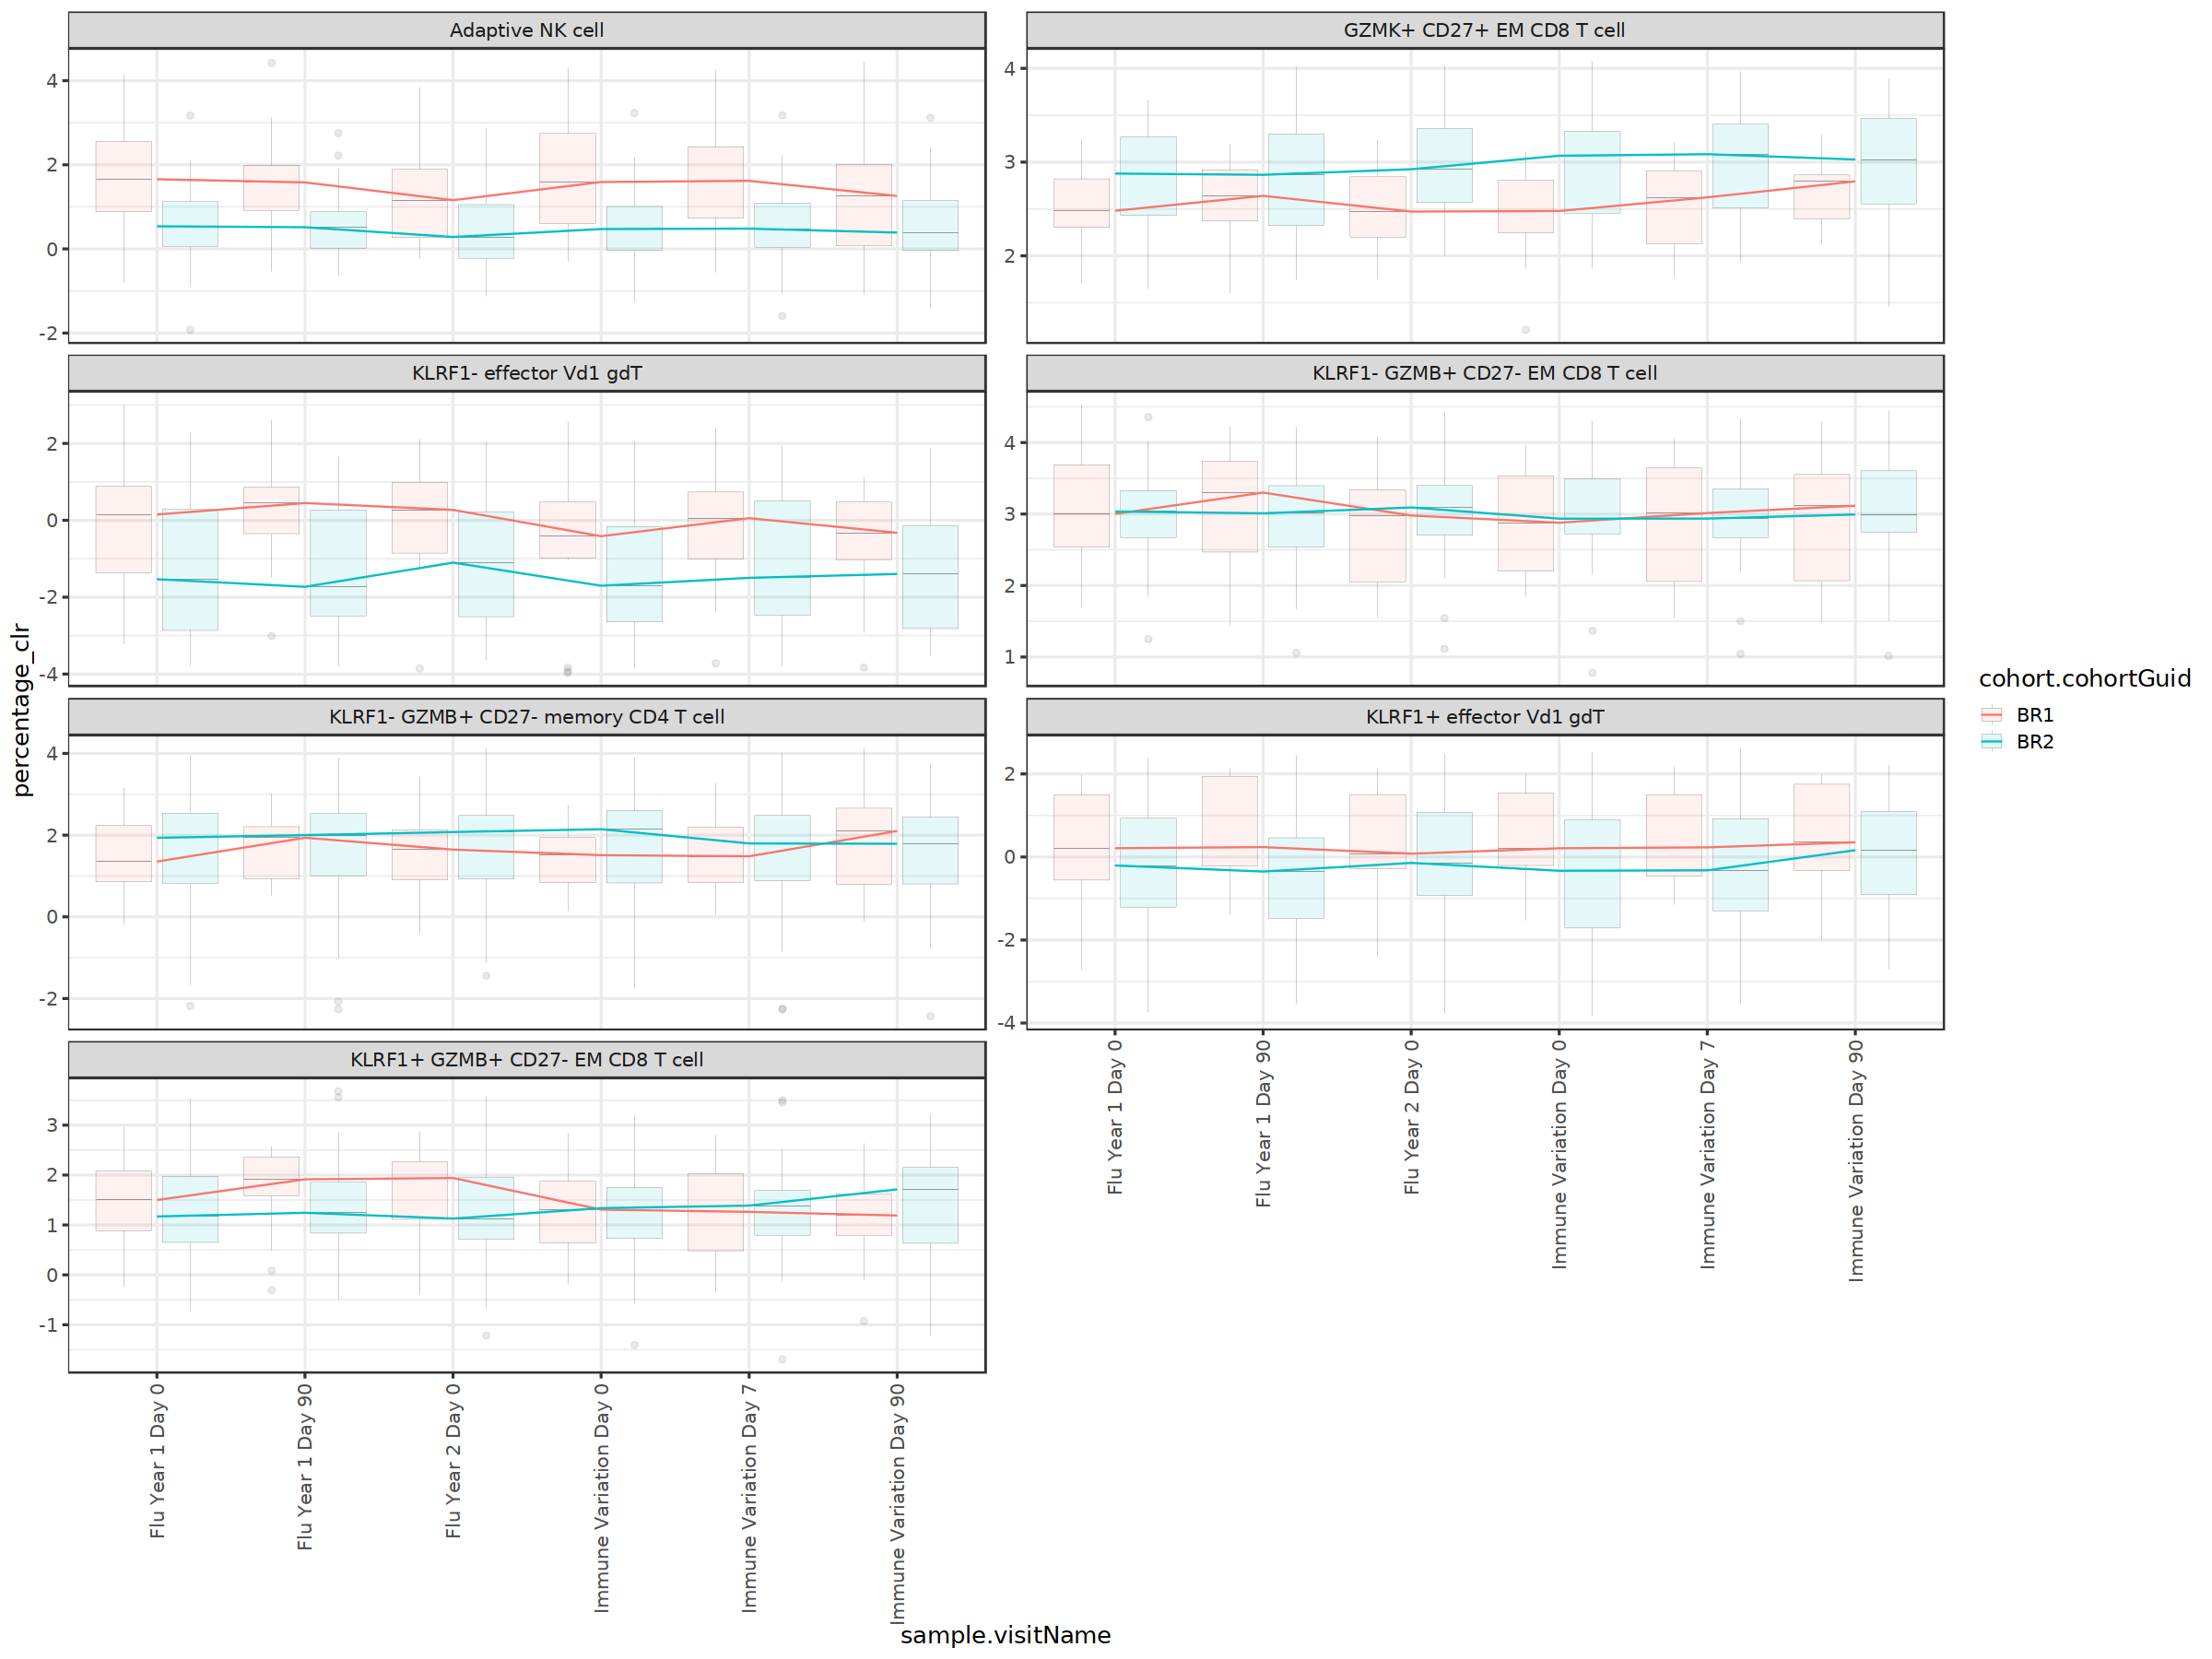

In [23]:
options(repr.plot.width = 20, repr.plot.height = 15)

ggplot(long_counts_df_subset %>% 
       filter(!sample.visitName %in% c('Flu Year 1 Day 7','Flu Year 2 Day 7',
                                       'Flu Year 1 Stand-Alone','Flu Year 2 Day 90',
                                                   'Flu Year 2 Stand-Alone',
                                                   'Flu Year 3 Stand-Alone')), 
       aes(x = sample.visitName, y = percentage_clr, fill = cohort.cohortGuid)) +
  geom_boxplot(position = position_dodge(width = 0.9),size=0.05,alpha=0.1) +
  stat_summary(
    fun.y = median,
    geom = 'line',
    aes(group =cohort.cohortGuid, colour = cohort.cohortGuid) )+theme_bw(base_size=15)+ 
theme(axis.text.x = element_text(angle = 90,
                                 vjust = 0.5,
                                 hjust = 1))+
facet_wrap(~AIFI_L3,ncol=2,scale='free_y')